<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Steps:" data-toc-modified-id="Steps:-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Steps:</a></span></li><li><span><a href="#General" data-toc-modified-id="General-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>General</a></span></li></ul></li><li><span><a href="#DATA" data-toc-modified-id="DATA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA</a></span><ul class="toc-item"><li><span><a href="#Download-and-take-a-look-at-the-data" data-toc-modified-id="Download-and-take-a-look-at-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Download and take a look at the data</a></span></li><li><span><a href="#Data-directories" data-toc-modified-id="Data-directories-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data directories</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Define-the-model-layers" data-toc-modified-id="Define-the-model-layers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Define the model layers</a></span></li><li><span><a href="#Compile-the-model" data-toc-modified-id="Compile-the-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Compile the model</a></span></li><li><span><a href="#Model-summary-and-plot" data-toc-modified-id="Model-summary-and-plot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model summary and <em>plot</em></a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Plot--the-learning-curves" data-toc-modified-id="Plot--the-learning-curves-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot  the learning curves</a></span></li><li><span><a href="#Test-model-on-'test'-dataset" data-toc-modified-id="Test-model-on-'test'-dataset-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Test model on <em>'test'</em> dataset</a></span></li></ul></li><li><span><a href="#Model-Improvement" data-toc-modified-id="Model-Improvement-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Improvement</a></span><ul class="toc-item"><li><span><a href="#Dropout" data-toc-modified-id="Dropout-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dropout</a></span></li><li><span><a href="#Augmentation" data-toc-modified-id="Augmentation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Augmentation</a></span></li></ul></li><li><span><a href="#Transfer-learning" data-toc-modified-id="Transfer-learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transfer learning</a></span></li></ul></div>

# Classification with Convolutional Neural Networks


The aim of this notebook is to showcase in practice - i.e. in code - how to build a simple CNN for the purpose of classifying image data.

The dataset used is intentionally a relatively small dataset, for the sake of time economy, but also in order to reduce the computational resources required.

Remember: https://keras.io is a useful source of information regarding Keras and Tensorflow.


###  Steps:

1) DATA. As a first step we will load the original data and divide the available images into three datasets (training, validation, test). 

2) MODEL. Build the network architecture. This is the part where we put together the code which: describes the neural network, processes the images, and feeds the images into the network for training. The training of the model also happens in this step.

3) LEARNING CURVES. Once the training is finished, plot the performance of the trained model (using 'accuracy' as our metric) in order to evaluate how it well it did (or not).

4) DROPOUT. A first effort to improve the performance of the model (if we observed overfitting earlier).

5) AUGMENTATION. Another way to improve model accuracy or avoid overfitting

6) TRANSFER LEARNING. Load and use an existing pretrained model ofr classifying the same dataset.



### General

Let's start by importing **various useful** libraries in one go. 
We also check the versions of keras and tensorflow he have in our disposal (because we can).
If more libraries become needed later on, come back to the cell below and add them here.

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import os, shutil
from shutil import copyfile
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

print(keras.__version__)
print(tensorflow.__version__)

2.4.0
2.4.1


In [2]:
# if curious about the hardware resources google has reserved for you in this GPU session, execute this:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## DATA


We will use an existing dataset, dowloaded from kaggle (https://www.kaggle.com/prasunroy/natural-images)

This is a set of images of 8 different objects. 
The original dataset is modified a bit in order to have equal number of images in each class.


### Download and take a look at the data

In [ ]:
# download a zip file containing the image data we will use 
!gdown --id 13uS1xSm1p6mjiTU72paSAB70p3XKn3NA


In [ ]:
# unzip the file
!unzip '/content/natural_images.zip'

This is an image of: cat


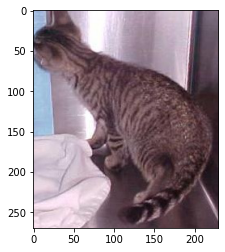

In [17]:
# let's randomly plot some of the images to see what they look like 
# (every time you execute this cell you will get a random image from your dataset)
data_path='/content/natural_images'
obj=random.choice(os.listdir(data_path))
file=random.choice(os.listdir(os.path.join(data_path,obj)))

print('This is an image of:',obj)
img=mpimg.imread(os.path.join(data_path,obj,file))
plt.imshow(img)
plt.show()

### Data directories

**Create a hierarchy of directories**, with seperate directories for *training*,  *validation*, and *test* datasets. Each one of these will contain a subdirectory for each *class*.

_Important_: __obviously, building the datasets only needs to be done once.__ 

In [6]:
# In the line below define as 'base' the entry dir of our session
base='/content'

# define the directory to store the datasets we will create soon
classification_data_path=os.path.join(base + '/natural_images_classification') 

In [7]:

# create the directory tree described earlier
if not os.path.exists(classification_data_path):
  os.mkdir(classification_data_path)

# define datasets (i.e. subdirs within the 'base' dir) and define classes (i.e. sub-subdirs for each of the dataset directories)
datasets=['train','validation','test']
classes=['airplane','car','cat','dog','flower','fruit','motorbike','person']

# create that hierarchy of dirs and subdirs
for dtype in datasets:
  path_set=os.path.join(classification_data_path,dtype)
  if not os.path.exists(path_set):
    os.mkdir(path_set)
  for c in classes:
    path_class=os.path.join(path_set,c)
    if not os.path.exists(path_class):
      os.mkdir(path_class)      

In [8]:
# Function  - named 'pop_dirs' - for splitting the data into train, validation, and test data (after shuffling them) 
# and populating the directory tree created above.

def pop_dirs(SOURCE, TRAINING, VALIDATION, TEST, SPLIT_SIZE):
    # create list of all filenames in the SOURCE directory
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, will skip.") # if a file is empty, ignore it

            
    # First decide how many files should go in each dataset (based on the SPLIT_SIZE parameter).
    # Then randomly assign which  filenames should go in each one of the datasets (shuffle namelinst before splitting them)        
    training_length = int(len(files) * SPLIT_SIZE)               
    validation_length = int((len(files) - training_length)/2.0)
    test_length = validation_length
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    validation_set = shuffled_set[training_length:training_length+validation_length]
    test_set = shuffled_set[training_length+validation_length:training_length+validation_length+test_length]


    # Based on the name lists created above, copy files into relevant dirs.
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in validation_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

    for filename in test_set:
        this_file = SOURCE + filename
        destination = TEST + filename
        copyfile(this_file, destination)

In [9]:
# The actual copying of files from the 'data' folder into the folder hierarchy created earlier. 

j=0
# fraction of data (from 0.0 to 1.0) to be used as training data. The rest will be split equally a
split_size = .7   


for c in classes:

  src_path=os.path.join(base,'natural_images',c)+'/'

  train_path=os.path.join(classification_data_path,'train',c)+'/' 
  validation_path=os.path.join(classification_data_path,'validation',c)+'/'
  test_path=os.path.join(classification_data_path,'test',c)+'/'

  print('Copyting data FROM:')
  print(src_path)
  print('TO:')
  print(train_path)
  print(validation_path)
  print(test_path)
  print('\n')  
    
  pop_dirs(src_path, train_path, validation_path, test_path, split_size)
  j+=1


Copyting data FROM:
/content/natural_images/airplane/
TO:
/content/natural_images_classification/train/airplane/
/content/natural_images_classification/validation/airplane/
/content/natural_images_classification/test/airplane/


Copyting data FROM:
/content/natural_images/car/
TO:
/content/natural_images_classification/train/car/
/content/natural_images_classification/validation/car/
/content/natural_images_classification/test/car/


Copyting data FROM:
/content/natural_images/cat/
TO:
/content/natural_images_classification/train/cat/
/content/natural_images_classification/validation/cat/
/content/natural_images_classification/test/cat/


Copyting data FROM:
/content/natural_images/dog/
TO:
/content/natural_images_classification/train/dog/
/content/natural_images_classification/validation/dog/
/content/natural_images_classification/test/dog/


Copyting data FROM:
/content/natural_images/flower/
TO:
/content/natural_images_classification/train/flower/
/content/natural_images_classificat

Check the number of images for each dataset and each class

In [10]:
datasets=['train','validation','test']
classes=['airplane','car','cat','dog','flower','fruit','motorbike','person']

for dset in datasets:
  for c in classes:
    path=os.path.join(base,'natural_images_classification',dset,c)
    print('number of',  dset,  'images in', c,':', len(os.listdir(path)))

number of train images in airplane : 490
number of train images in car : 490
number of train images in cat : 491
number of train images in dog : 490
number of train images in flower : 490
number of train images in fruit : 490
number of train images in motorbike : 490
number of train images in person : 490
number of validation images in airplane : 105
number of validation images in car : 105
number of validation images in cat : 105
number of validation images in dog : 105
number of validation images in flower : 105
number of validation images in fruit : 105
number of validation images in motorbike : 105
number of validation images in person : 105
number of test images in airplane : 105
number of test images in car : 105
number of test images in cat : 105
number of test images in dog : 105
number of test images in flower : 105
number of test images in fruit : 105
number of test images in motorbike : 105
number of test images in person : 105


**EXCELLENT!** You now have generated three dataset directories, with the data needed for training and evaluating your model. **Let's now build the model**

## Model

This section containes the code for the CNN model architecture, loading the data into the model, compiling the model, and training the model.

In [ ]:
# Run ONLY when clearing of the session is needed

tensorflow.keras.backend.clear_session()

In [11]:
# Place needed and updatable parameters in a dictionary for easy access and change
PARAMS = {'lr': 1e-3, # Learning Rate
          'batch_size': 64,
          'n_epochs': 50,
          'loss': 'categorical_crossentropy',
          'metrics': 'acc', # accuracy
          'image_input_shape' : (100,100,3),
          'save_model' : 'classification_1.h5'
          }

In [12]:
# Use the ImageDataGenerator class from Keras, and its flow_from_directory method to generate shuffled data batches

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train = train_datagen.flow_from_directory(
        classification_data_path+'/train',
        target_size=(100, 100),
        batch_size=PARAMS['batch_size'],
        class_mode='categorical') 

validation = validation_datagen.flow_from_directory(
        classification_data_path+'/validation',
        target_size=(100, 100),
        batch_size=PARAMS['batch_size'],
        class_mode='categorical')


test = test_datagen.flow_from_directory(
        classification_data_path+'/test',
        target_size=(100, 100),
        batch_size=PARAMS['batch_size'],
        class_mode='categorical')

Found 3921 images belonging to 8 classes.
Found 840 images belonging to 8 classes.
Found 840 images belonging to 8 classes.


In [27]:
# Check the sizes of the image and label batches (useful for debugging size errors)
for images_batch, labels_batch in train:
    print('Image batches have shape:', images_batch.shape)
    print('Label batches have shape:', labels_batch.shape)
    break

Image batches have shape: (64, 100, 100, 3)
Label batches have shape: (64, 8)


### Define the model layers


Use Conv2D layers, each of wich will be followed by MaxPooling2D layer. 

- How many Conv2D layers to use? (in this case **3 is a good guess** to start with)
- Number of filters for each? (powers of two typically used, with number of filters typically increassing in deeper layers, i.e. 32,64,128)
- Size of these filters? 3x3, or 5x5, or 7x7 are typical values (start with **3x3**)
- A Flatten layer should be added after the last Conv2D + MaxPooling layer 
- Last layer should be a Dense layer with a 'softmax' activation, as we are building a 'classification' model. The number of nodes for this layer should of course be equal to the number of classes in our data.
- It is likely that more Dense layers can be added between the Flatten and the last Dense layer (the classifier).


<font color='blue'> **Task 1:**
+ Build the CNN, by adding the necessary sequence of layers: use what was discussed in the lecture and in the text just above as quide. 
You should build something like this: </font>

<font color='blue'>
Conv2D + MaxPooling --> Conv2D + MaxPooling --> Conv2D + MaxPooling --> Flatten --> Dense --> Dense(final classifier with softmax activation)
</font>

**The first convolutional layer (input layer) and following maxpooling is already in place as a guide. NOTE: only input layer needs the 'Input_shape argument'**

In [13]:
# The model layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=PARAMS['image_input_shape']))
### add code here:
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

### Compile the model

In [15]:
model.compile(loss=PARAMS['loss'],
              optimizer=optimizers.Adam(lr=PARAMS['lr']),
              metrics=[PARAMS['metrics']])

### Model summary and *plot*

Draw a summary of each layer of the model.

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

Plot a graph of the model architecture

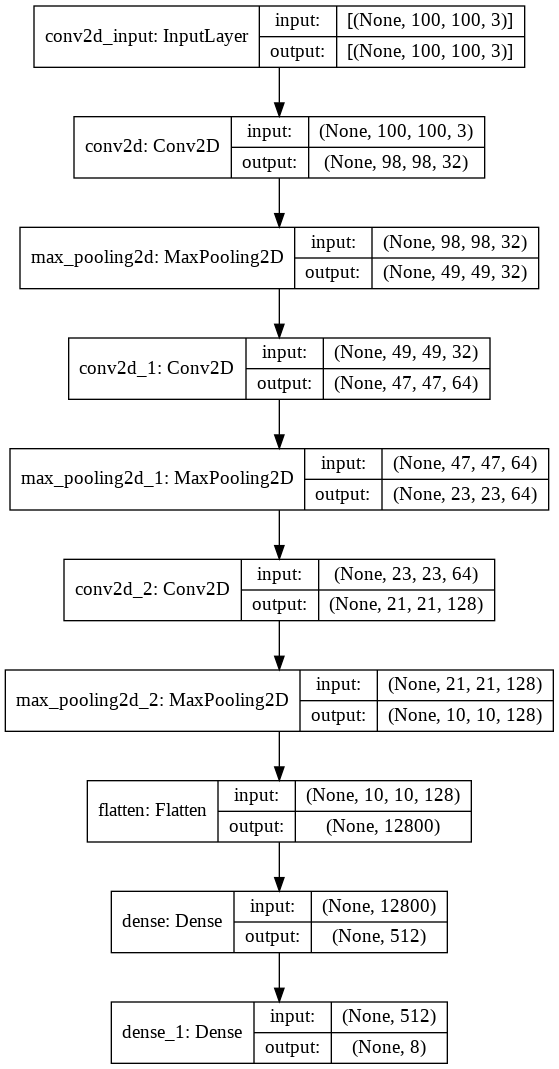

In [25]:
# create a graph of the model layers and save a png image of it
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True,rankdir='TB',show_layer_names=True)

### Train the model

In [16]:
# Fit (i.e train) the model 

spe=len(train)   # Steps Per Epoch: train_size/batch_size
epoch_num=PARAMS['n_epochs']
val_steps=len(validation)  # validation_size/batch_size


history = model.fit(
            train,
            steps_per_epoch=spe,  
            epochs=epoch_num,
            validation_data=validation,
            validation_steps=val_steps) 


# To save the output of the model, uncomment the line below.
#model.save(PARAMS['save_model'])

Epoch 1/50
62/62 [==============================] - 15s 122ms/step - loss: 1.4730 - acc: 0.4586 - val_loss: 0.6328 - val_acc: 0.7595
Epoch 2/50
62/62 [==============================] - 7s 118ms/step - loss: 0.4475 - acc: 0.8325 - val_loss: 0.4722 - val_acc: 0.8310
Epoch 3/50
62/62 [==============================] - 7s 118ms/step - loss: 0.3040 - acc: 0.8903 - val_loss: 0.2982 - val_acc: 0.8940
Epoch 4/50
62/62 [==============================] - 7s 119ms/step - loss: 0.1832 - acc: 0.9325 - val_loss: 0.2504 - val_acc: 0.9095
Epoch 5/50
62/62 [==============================] - 7s 120ms/step - loss: 0.0994 - acc: 0.9659 - val_loss: 0.3131 - val_acc: 0.8952
Epoch 6/50
62/62 [==============================] - 7s 118ms/step - loss: 0.0840 - acc: 0.9678 - val_loss: 0.3519 - val_acc: 0.8940
Epoch 7/50
62/62 [==============================] - 7s 118ms/step - loss: 0.0646 - acc: 0.9770 - val_loss: 0.3222 - val_acc: 0.8976
Epoch 8/50
62/62 [==============================] - 7s 118ms/step - loss: 0

In [19]:
#model.predict_classes(file)
np.argmax(model.predict(file), axis=-1)

IndexError: ignored

### Plot  the learning curves 

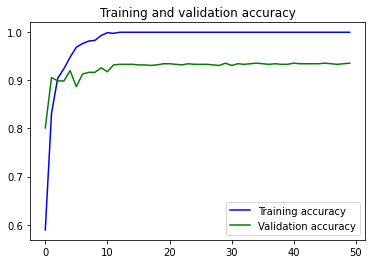

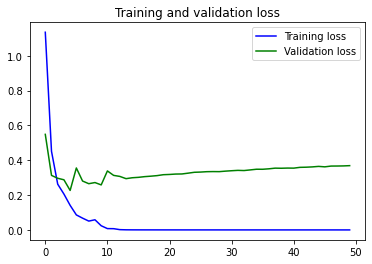

In [27]:
# Check the progress of the training, by plotting the Learning Curves:
# a) Accuracy of the model on the train and validation datasets as a function of epochs (time)
# b) Value of loss function on train and validation datasets as a function of epochs

# if the model was saved from an earlier run, uncomment the line below to load it
#model = load_model('name_of_model_to_load.h5')

epoch_num=PARAMS['n_epochs']
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(epoch_num), acc, 'b', label='Training accuracy')
plt.plot(range(epoch_num), val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(range(epoch_num), loss, 'b', label='Training loss')
plt.plot(range(epoch_num), val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

### Test model on *'test'* dataset

As a final step on checking the performance of the model, we run the trained model on the third dataset, the 'test' dataset. (These are data that our model has not seen yet).


In [28]:
test_score = model.evaluate(test)
print(model.metrics_names)
print(test_score)
print()
print("Accuracy = ",test_score[1]*100,'%')

14/14 [==============================] - 1s 84ms/step - loss: 0.3943 - acc: 0.9202
['loss', 'acc']
[0.39429277181625366, 0.9202380776405334]

Accuracy =  92.02380776405334 %


## Model Improvement


### Dropout


One way to overcome overfitting of the model is to add one or more Dropout layers in the model. (https://keras.io/api/layers/regularization_layers/dropout/)

A 'Dropout' layer will randomly drop-out (i.e. remove) a user-defined number of nodes (i.e. connections) between two layers.

Adding a dropout layer looks like this:
    *model.add(layers.Dropout(0.5))*
The argument of Dropout is a number from 0.0 to 1.0 which corresponds to the fraction of nodes to **remove** . 

A typical value  is around 0.5-0.6 (i.e. 50-60% or the nodes removed).


<font color='blue'>**Task 2**
Add a Dropout Layer (or try adding more that one) in the model you created earlier and train the model again.
How do the learning curves compare to those of the previous model?

**NOTE:** 
 + remember to clear the session with the command available at the beginning of Section 2
 + must run again the cell with the model architecture, and compile the model again before fitting the new architecture. 
</font>


In [ ]:
# clear the session

### add code here:
tensorflow.keras.backend.clear_session()

In [ ]:
# model layers
# use the previous model PLUS a (or two) dropout layer


### add code here:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=PARAMS['image_input_shape']))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(8, activation='softmax'))

In [ ]:
# compile the model

### add code here:
model.compile(loss=PARAMS['loss'],
              optimizer=optimizers.Adam(lr=PARAMS['lr']),
              metrics=[PARAMS['metrics']])


In [ ]:
# fit the model
spe=len(train)   # Steps Per Epoch: train_size/batch_size
epoch_num=PARAMS['n_epochs']
val_steps=len(validation)  # validation_size/batch_size

### add code here:
history = model.fit(
            train,
            steps_per_epoch=spe,  
            epochs=epoch_num,
            validation_data=validation,
            validation_steps=val_steps) 


Epoch 1/50
62/62 [==============================] - 8s 121ms/step - loss: 1.6050 - acc: 0.4055 - val_loss: 0.5281 - val_acc: 0.8160
Epoch 2/50
62/62 [==============================] - 7s 118ms/step - loss: 0.5590 - acc: 0.7944 - val_loss: 0.4859 - val_acc: 0.8315
Epoch 3/50
62/62 [==============================] - 7s 117ms/step - loss: 0.3871 - acc: 0.8627 - val_loss: 0.2889 - val_acc: 0.8877
Epoch 4/50
62/62 [==============================] - 7s 117ms/step - loss: 0.2761 - acc: 0.8968 - val_loss: 0.3109 - val_acc: 0.8865
Epoch 5/50
62/62 [==============================] - 7s 118ms/step - loss: 0.2051 - acc: 0.9284 - val_loss: 0.2389 - val_acc: 0.9140
Epoch 6/50
62/62 [==============================] - 7s 119ms/step - loss: 0.1605 - acc: 0.9407 - val_loss: 0.2314 - val_acc: 0.9200
Epoch 7/50
62/62 [==============================] - 7s 118ms/step - loss: 0.1328 - acc: 0.9550 - val_loss: 0.2421 - val_acc: 0.9152
Epoch 8/50
62/62 [==============================] - 7s 117ms/step - loss: 0.

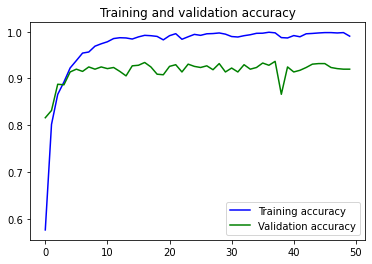

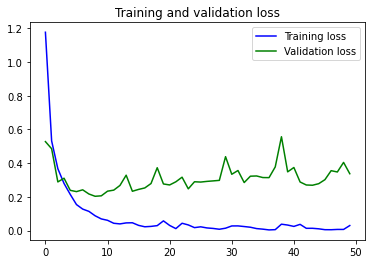

In [ ]:
# plot the learning curves

### add code here:

epoch_num=PARAMS['n_epochs']
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(epoch_num), acc, 'b', label='Training accuracy')
plt.plot(range(epoch_num), val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(range(epoch_num), loss, 'b', label='Training loss')
plt.plot(range(epoch_num), val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [ ]:
# evaluate model on *test* dataset

### add code here:

test_score = model.evaluate(test)
print(model.metrics_names)
print(test_score)
print()
print("Accuracy = ",test_score[1]*100,'%')

14/14 [==============================] - 1s 88ms/step - loss: 0.4425 - acc: 0.9155
['loss', 'acc']
[0.44247788190841675, 0.9154762029647827]

Accuracy =  91.54762029647827 %


### Augmentation

One possible remedy for overfitting, when it is caused by lack of enough data, is to use data augmentation.
In data augmentation, already existing data - images in our case - are 'tranformed' into new data through some basic transformations like mirroring or flipping, rotation, zoom, rescaling, etc.  of the image.


In Keras, the ImageDataGenerator class, offers an easy way to include these augmentation techniques.
Check the ImageDataGenerator entry here:https://keras.io/api/preprocessing/image/  to see how it is done.

<font color='blue'>**Task 3**
-Based on the Keras link above, choose the augmentation transformations which make sense for the dataset you are using, and implement these transformations within the ImageDataGenerator.        
**NOTE**: augmentation is applied only on the training dataset   
-Train again the model and plot its performance on the new, augmented dataset.  
-Do not forget to also evaluate the trained model on the 'test' dataset</font>
    
    

In [ ]:
# clear the session

### add code here:
tensorflow.keras.backend.clear_session()

In [ ]:

# add arguments that define augmentation techniques in the ImageDataGenerator line below

### add code here:
#train_datagen = ImageDataGenerator(rescale=1.0/255. ### complete with the right arguments) 
train_datagen = ImageDataGenerator(rescale = 1.0/255.,horizontal_flip=True,zoom_range=0.2,rotation_range=20,width_shift_range=0.1,height_shift_range=0.1)

# this can be left as is
train = train_datagen.flow_from_directory(
        classification_data_path+'/train',
        target_size=(100, 100),
        batch_size=PARAMS['batch_size'],
        class_mode='categorical') 



Found 3924 images belonging to 8 classes.


In [ ]:
# use the same model layers which you used the first time (i.e. no dropout layer)

### add code here:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=PARAMS['image_input_shape']))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

In [ ]:
# compile model 
model.compile(loss=PARAMS['loss'],
              optimizer=optimizers.Adam(PARAMS['lr']),
              metrics=[PARAMS['metrics']])

In [ ]:
# Fit the model 
spe=len(train)   # train_size/batch_size
epoch_num=PARAMS['n_epochs']
val_steps=len(validation)  # validation_size/batch_size


history = model.fit(
            train,
            steps_per_epoch=spe,  
            epochs=epoch_num,
            validation_data=validation,
            validation_steps=val_steps) 

Epoch 1/50
62/62 [==============================] - 15s 243ms/step - loss: 1.6138 - acc: 0.4175 - val_loss: 0.6009 - val_acc: 0.7849
Epoch 2/50
62/62 [==============================] - 15s 237ms/step - loss: 0.6773 - acc: 0.7604 - val_loss: 0.5049 - val_acc: 0.8124
Epoch 3/50
62/62 [==============================] - 15s 238ms/step - loss: 0.5360 - acc: 0.7986 - val_loss: 0.5076 - val_acc: 0.8256
Epoch 4/50
62/62 [==============================] - 15s 238ms/step - loss: 0.4353 - acc: 0.8388 - val_loss: 0.3199 - val_acc: 0.8841
Epoch 5/50
62/62 [==============================] - 15s 238ms/step - loss: 0.4173 - acc: 0.8380 - val_loss: 0.4347 - val_acc: 0.8530
Epoch 6/50
62/62 [==============================] - 15s 238ms/step - loss: 0.3866 - acc: 0.8635 - val_loss: 0.3150 - val_acc: 0.8769
Epoch 7/50
62/62 [==============================] - 15s 239ms/step - loss: 0.3183 - acc: 0.8828 - val_loss: 0.2988 - val_acc: 0.8889
Epoch 8/50
62/62 [==============================] - 15s 240ms/step - 

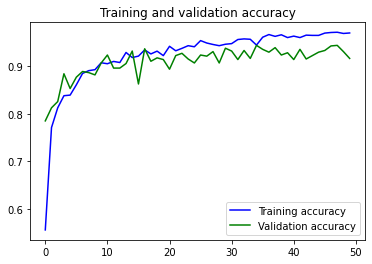

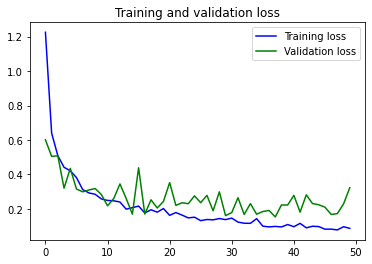

In [ ]:
# plot the learning curves


epoch_num=PARAMS['n_epochs']
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(epoch_num), acc, 'b', label='Training accuracy')
plt.plot(range(epoch_num), val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(range(epoch_num), loss, 'b', label='Training loss')
plt.plot(range(epoch_num), val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [ ]:
# evaluate model on *test* dataset

test_score = model.evaluate(test)
print(model.metrics_names)
print(test_score)
print()
print("Accuracy = ",test_score[1]*100,'%')

14/14 [==============================] - 1s 86ms/step - loss: 0.4234 - acc: 0.8964
['loss', 'acc']
[0.42343541979789734, 0.8964285850524902]

Accuracy =  89.64285850524902 %


## Transfer learning

We will use the VGG16 network (https://arxiv.org/abs/1409.1556) trained on the ImageNet dataset (http://image-net.org/about-overview).
As it is already part of the Keras library, it is easy to load.


In [ ]:
# clear the prevoius session if needed
tensorflow.keras.backend.clear_session()

In [ ]:
# Import VGG16
from tensorflow.keras.applications import VGG16

In [ ]:
# Create a copy of the VGG16 network, with input_size to match our dataset, and without including the last output layer(s)
pretrained_net = VGG16(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='max')

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# Plot the summary of the pretrained network

### add code here
pretrained_net.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [ ]:
# 'Freeze' (i.e. make them untrainable) all layers in thre pretrained network
for layer in pretrained_net.layers:
    layer.trainable=False

In [ ]:
# Add a couple of layers at the end of the pretrained network: we need to add our own output layer, 
# which will classify our data according to the number of classes we have.

model2 = models.Sequential()
model2.add(pretrained_net)
model2.add(layers.Dense(8, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 8)                 4104      
Total params: 14,718,792
Trainable params: 4,104
Non-trainable params: 14,714,688
_________________________________________________________________


<font color='blue'> **Task 4:**
   
- Train the pretrained network (in reallity only the layers we added will be trained, we 'froze' all the layers previous to those) with the same data as before and compaire its performance to that of the previous model.
* Add code for plotting the learning curves for this model (you can also choose to overplot the learning curves of the previous model for direct comparison)
- Test the accuracty of the model on the 'test' dataset. </font>

In [ ]:
# compile model 

### add code here
model2.compile(loss=PARAMS['loss'],
              optimizer=optimizers.Adam(PARAMS['lr']),
              metrics=[PARAMS['metrics']])




In [ ]:
# Fit the model 


### add code here

spe=len(train)   # train_size/batch_size
epoch_num=PARAMS['n_epochs']
val_steps=len(validation)  # validation_size/batch_size


history = model2.fit(
            train,
            steps_per_epoch=spe,  
            epochs=epoch_num,
            validation_data=validation,
            validation_steps=val_steps) 



Epoch 1/50
66/66 [==============================] - 10s 134ms/step - loss: 1.6666 - acc: 0.4472 - val_loss: 0.6519 - val_acc: 0.8693
Epoch 2/50
66/66 [==============================] - 8s 122ms/step - loss: 0.5651 - acc: 0.8927 - val_loss: 0.3812 - val_acc: 0.9247
Epoch 3/50
66/66 [==============================] - 8s 124ms/step - loss: 0.3572 - acc: 0.9260 - val_loss: 0.2838 - val_acc: 0.9503
Epoch 4/50
66/66 [==============================] - 8s 125ms/step - loss: 0.2773 - acc: 0.9446 - val_loss: 0.2416 - val_acc: 0.9531
Epoch 5/50
66/66 [==============================] - 8s 124ms/step - loss: 0.2304 - acc: 0.9532 - val_loss: 0.2043 - val_acc: 0.9560
Epoch 6/50
66/66 [==============================] - 8s 125ms/step - loss: 0.2017 - acc: 0.9551 - val_loss: 0.1907 - val_acc: 0.9517
Epoch 7/50
66/66 [==============================] - 8s 126ms/step - loss: 0.1778 - acc: 0.9559 - val_loss: 0.1717 - val_acc: 0.9602
Epoch 8/50
66/66 [==============================] - 8s 126ms/step - loss: 0

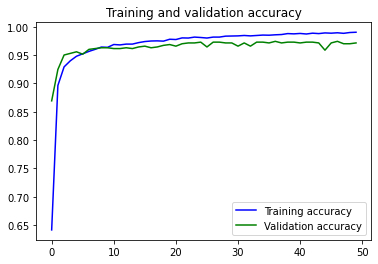

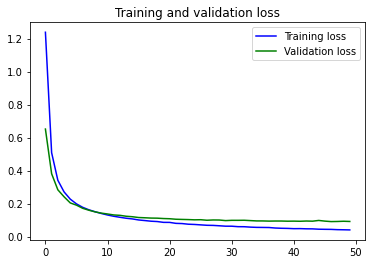

In [ ]:
# plot learning curves
epoch_num=PARAMS['n_epochs']
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(epoch_num), acc, 'b', label='Training accuracy')
plt.plot(range(epoch_num), val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(range(epoch_num), loss, 'b', label='Training loss')
plt.plot(range(epoch_num), val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()
### add code here

In [ ]:
# evaluate trained model on 'test' dataset

### add code here

test_score = model2.evaluate(test)
print(model2.metrics_names)
print(test_score)
print()
print("Accuracy = ",test_score[1]*100,'%')

11/11 [==============================] - 2s 174ms/step - loss: 0.1137 - acc: 0.9616
['loss', 'acc']
[0.11370887607336044, 0.9615931510925293]

Accuracy =  96.15931510925293 %


(1, 100, 100, 3)


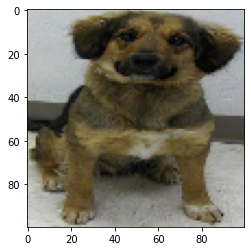

[2.0529472e-11 1.4944414e-11 1.6222389e-04 9.9983776e-01 1.8852067e-14
 3.3158476e-11 1.0083493e-14 2.9478137e-12]
I am 99.98377561569214 % certain that this is a  dog


In [35]:
# now that we trained a model, how to we call it and use it with individual inputs?
# here's one way to do it:


# load an image, transorm it into the right input shape for the model (and values 0-1)
img_path='/content/natural_images/dog/dog_0003.jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

## check the image
plt.imshow(img_tensor[0])
plt.show()

## ask model to predict
prediction = model.predict(img_tensor)
print(prediction[0])


class_labels=train.class_indices
class_labels=dict((value,key) for key,value in labels.items())
predicted_class=class_labels[np.argmax(prediction[0],axis=-1)]
accuracy=np.max(prediction)
print('I am', accuracy*100,'%' ' certain that this is a ', predicted_class)
